# Gaussian Mixture Model

Being one of the **mixture models**, this method is used to perform soft clustering. Optimized using **Expectation-Maximization** algorithm.

In [1]:
import numpy as np
from numpy import apply_along_axis as apply
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from scipy.stats import norm, multivariate_normal
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# hyperparameters
k = 4
it = 15

In [3]:
# generate a dataset
X, Y = make_blobs(n_samples=2000, centers=5,cluster_std=1.2,random_state=123,n_features=2)
X = X - np.min(X,axis=0)

# split for training
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

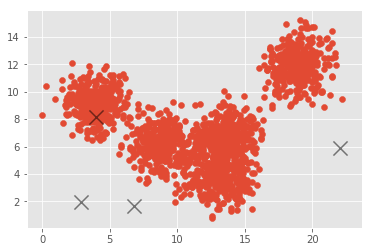

In [4]:
# initialize cluster centers within these limits
#limits = np.quantile(X_train,[0.05,0.95],axis=0)
limits = np.r_[np.min(X_train,axis=0).reshape((1,-1)),np.max(X_train,axis=0).reshape((1,-1))]

# initialize randomly
mu = [apply(lambda x: np.random.uniform(x[0],x[1]),0,limits) for _ in range(k)]
#tmp = np.cov(X_train,rowvar=False)
tmp = np.array([[1.2,1],[1,1.5]])
sigma = [tmp for _ in range(k)]
del tmp

plt.scatter(X_train[:,0],X_train[:,1])
plt.scatter(np.asarray(mu)[:,0],np.asarray(mu)[:,1], c='black', s=200, alpha=0.5, marker = 'x')
plt.show()

# initialize mixture weights
mix = np.ones(k)/k

In [5]:
for i in range(it):
    ### Expectation Step
    # probabilities for each distr.
    prob = [multivariate_normal(m,s).pdf(X_train) for m,s in zip(mu,sigma)]
    prob = np.asarray(prob).T

    # multiply with mixture weights
    prob = prob * mix

    # normalize each row
    prob = prob/np.sum(prob,axis=1).reshape((-1,1))

    ### Maximization step - multiply probabilities of each distr with data, and calc. mu and sigma
    # calculate total probabilities for each distr.
    m_c = np.sum(prob,axis=0)
    
    # new weights for each distr.
    mix = m_c/X_train.shape[0]
    
    # new mu for each distr.
    mu = [np.sum(X_train*prob[:,i].reshape((-1,1)),axis=0)/m_c[i] for i in range(k)]

    # new cov. for each distr.
    for j in range(k):
        tmp = X_train - mu[j]
        sigma[j] = np.dot(prob[:,j]*tmp.T,tmp)/m_c[j]
    
    # observe convergence
    print(np.sum(np.log(prob)))

-412727.29392785934
-235113.374159907
-192715.3898980971
-171433.7210212171
-158183.38425169658
-147801.22955461708
-139458.20287935776
-133366.60478123336
-131351.32117743272
-140380.4818427279
-156266.492141868
-160931.073483932
-161071.02080955348
-160789.7894599205
-160545.72939016434


In [6]:
# resulting parameters
print(mix)
print(mu)
print(sigma)

[0.19898707 0.40764412 0.20121525 0.19215357]
[array([18.89252291, 11.8744722 ]), array([13.32850991,  5.34344629]), array([3.87970167, 9.1808956 ]), array([8.73780643, 6.13248312])]
[array([[1.3944677 , 0.14649287],
       [0.14649287, 1.59541377]]), array([[1.61417539, 0.36193423],
       [0.36193423, 3.27966157]]), array([[ 1.33147585, -0.01442715],
       [-0.01442715,  1.21901045]]), array([[1.11726284, 0.02429384],
       [0.02429384, 1.24494139]])]


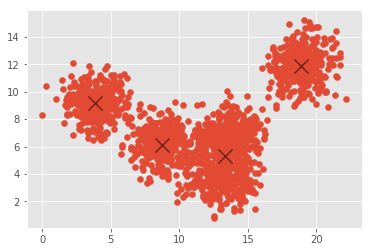

In [7]:
# cluster centers (means)
plt.scatter(X_train[:,0],X_train[:,1])
plt.scatter(np.asarray(mu)[:,0],np.asarray(mu)[:,1], c='black', s=200, alpha=0.5, marker = 'x')
plt.show()

In [8]:
def log_prob(x,mix,mu,sigma):
    prob = [multivariate_normal(m,s).pdf(x) for m,s in zip(mu,sigma)]
    prob = np.asarray(prob).T
    prob = prob*mix
    return np.log(np.sum(prob,axis=1))

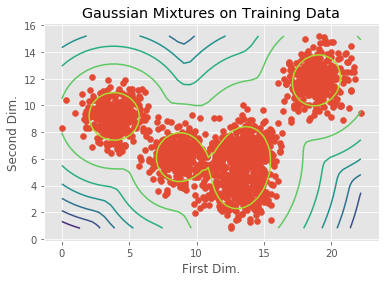

In [9]:
# contour plot parameters
XX, YY = np.meshgrid(np.linspace(limits[0][0],limits[1][0]),
                     np.linspace(limits[0][1],limits[1][1]))
xx = np.array([XX.ravel(), YY.ravel()]).T
Z = log_prob(xx,mix,mu,sigma)
Z = Z.reshape((50,50))

plt.contour(XX, YY, Z)
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.title('Gaussian Mixtures on Training Data')
plt.xlabel('First Dim.')
plt.ylabel('Second Dim.')
plt.show()

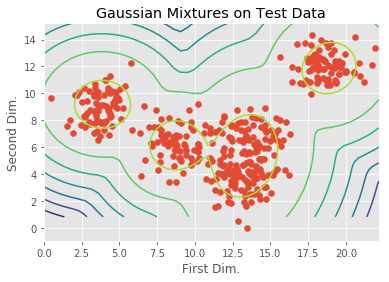

In [10]:
plt.contour(XX, YY, Z)
plt.scatter(X_test[:, 0], X_test[:, 1])
plt.title('Gaussian Mixtures on Test Data')
plt.xlabel('First Dim.')
plt.ylabel('Second Dim.')
plt.show()